# HISTORY

* The IUCN Red List of Threatened Species™ is the world's most comprehensive inventory of the global conservation status of plant and animal species. It uses a set of quantitative criteria to evaluate the extinction risk of thousands of species.

# PACKAGES AND LIBRARIES

In [1]:
#GENERAL
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
#PATH PROCESS
import os
import os.path
from pathlib import Path
import glob
#IMAGE PROCESS
from PIL import Image
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.preprocessing import image
import skimage
from skimage.feature import hessian_matrix, hessian_matrix_eigvals
from scipy.ndimage.filters import convolve
from skimage import data, io, filters
#SCALER & TRANSFORMATION
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers
from sklearn.preprocessing import LabelEncoder
#ACCURACY CONTROL
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
#OPTIMIZER
from keras.optimizers import RMSprop,Adam,Optimizer,Optimizer, SGD
#MODEL LAYERS
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D,BatchNormalization,\
                        Permute, TimeDistributed, Bidirectional,GRU, SimpleRNN, LSTM, GlobalAveragePooling2D, SeparableConv2D,\
ZeroPadding2D, Convolution2D, ZeroPadding2D, ReLU
from keras import models
from keras import layers
import tensorflow as tf
from keras.applications import VGG16,VGG19,inception_v3
from keras import backend as K
from keras.utils import plot_model
from keras.models import load_model
from keras.regularizers import l1,l2,L1L2
#SKLEARN CLASSIFIER
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
from catboost import CatBoostClassifier, CatBoostRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
#IGNORING WARNINGS
from warnings import filterwarnings
filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning) 
filterwarnings("ignore", category=UserWarning)

# PATH, LABEL, TRANSFORMATION

#### MAIN PATH

In [2]:
Main_Animal_Path = Path("../input/danger-of-extinction-animal-image-set/Danger Of Extinction")

#### ANIMAL PATH

In [3]:
Animal_JPG = list(Main_Animal_Path.glob(r"*/*.jpg"))

#### ANIMAL LABELS

In [4]:
Animal_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],Animal_JPG))

#### TO SERIES

In [5]:
Animal_JPG_Series = pd.Series(Animal_JPG,name="JPG").astype(str)
Animal_Labels_Series = pd.Series(Animal_Labels,name="CATEGORY")

#### TO DATAFRAME

In [6]:
Main_Train_Data = pd.concat([Animal_JPG_Series,Animal_Labels_Series],axis=1)

In [7]:
print(Main_Train_Data.head(-1))

                                                    JPG          CATEGORY
0     ../input/danger-of-extinction-animal-image-set...        Chimpanzee
1     ../input/danger-of-extinction-animal-image-set...        Chimpanzee
2     ../input/danger-of-extinction-animal-image-set...        Chimpanzee
3     ../input/danger-of-extinction-animal-image-set...        Chimpanzee
4     ../input/danger-of-extinction-animal-image-set...        Chimpanzee
...                                                 ...               ...
6302  ../input/danger-of-extinction-animal-image-set...  African_Elephant
6303  ../input/danger-of-extinction-animal-image-set...  African_Elephant
6304  ../input/danger-of-extinction-animal-image-set...  African_Elephant
6305  ../input/danger-of-extinction-animal-image-set...  African_Elephant
6306  ../input/danger-of-extinction-animal-image-set...  African_Elephant

[6307 rows x 2 columns]


#### SHUFFLE

In [8]:
Main_Train_Data = Main_Train_Data.sample(frac=1).reset_index(drop=True)

In [9]:
print(Main_Train_Data.head(-1))

                                                    JPG          CATEGORY
0     ../input/danger-of-extinction-animal-image-set...  African_Elephant
1     ../input/danger-of-extinction-animal-image-set...              Lion
2     ../input/danger-of-extinction-animal-image-set...        Chimpanzee
3     ../input/danger-of-extinction-animal-image-set...             Rhino
4     ../input/danger-of-extinction-animal-image-set...              Lion
...                                                 ...               ...
6302  ../input/danger-of-extinction-animal-image-set...           Jaguars
6303  ../input/danger-of-extinction-animal-image-set...          Panthers
6304  ../input/danger-of-extinction-animal-image-set...  African_Elephant
6305  ../input/danger-of-extinction-animal-image-set...          cheetahs
6306  ../input/danger-of-extinction-animal-image-set...           Jaguars

[6307 rows x 2 columns]


#### CHECKING

In [10]:
plt.style.use("classic")

In [11]:
print(Main_Train_Data["CATEGORY"].value_counts())

Panda               792
Lion                754
Rhino               713
cheetahs            587
Jaguars             574
Panthers            561
Amur_Leopard        530
Orangutan           496
African_Elephant    470
Chimpanzee          462
Arctic_Fox          369
Name: CATEGORY, dtype: int64


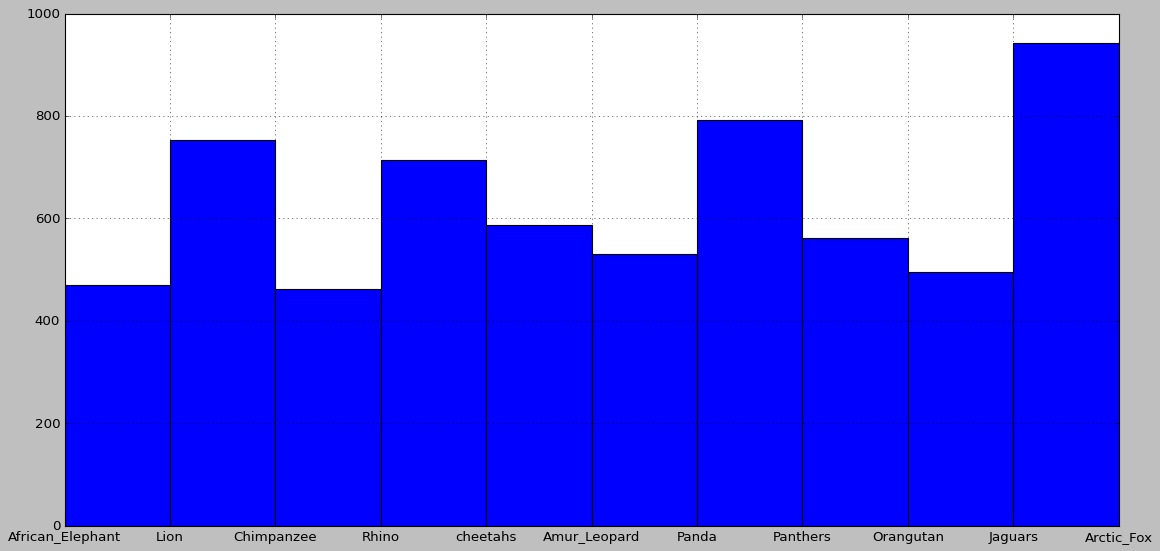

In [12]:
Main_Train_Data["CATEGORY"].hist(figsize=(17,8))
plt.show()

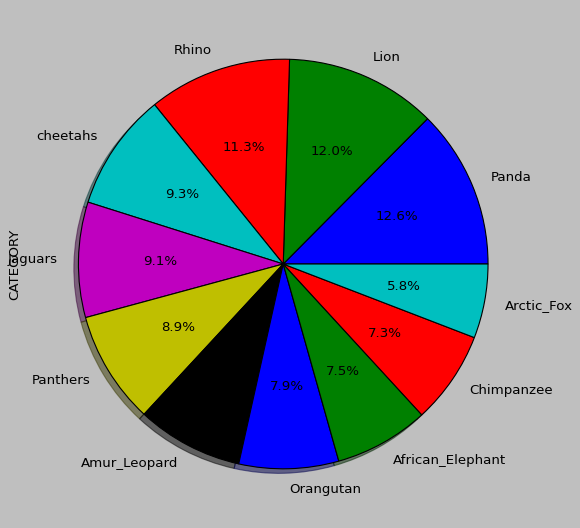

In [13]:
Main_Train_Data["CATEGORY"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,figsize=(15,8))
plt.show()

# VISUALIZATION

In [14]:
Amur_Leopard = Main_Train_Data[Main_Train_Data["CATEGORY"] == "Amur_Leopard"]
Lion = Main_Train_Data[Main_Train_Data["CATEGORY"] == "Lion"]
Panda = Main_Train_Data[Main_Train_Data["CATEGORY"] == "Panda"]
Chimpanzee = Main_Train_Data[Main_Train_Data["CATEGORY"] == "Chimpanzee"]
Rhino = Main_Train_Data[Main_Train_Data["CATEGORY"] == "Rhino"]
Cheetahs = Main_Train_Data[Main_Train_Data["CATEGORY"] == "cheetahs"]
Jaguars = Main_Train_Data[Main_Train_Data["CATEGORY"] == "Jaguars"]
Panthers = Main_Train_Data[Main_Train_Data["CATEGORY"] == "Panthers"]
Orangutan = Main_Train_Data[Main_Train_Data["CATEGORY"] == "Orangutan"]
African_Elephant = Main_Train_Data[Main_Train_Data["CATEGORY"] == "African_Elephant"]
Arctic_Fox = Main_Train_Data[Main_Train_Data["CATEGORY"] == "Arctic_Fox"]

Amur_Leopard = Amur_Leopard.reset_index()
Lion = Lion.reset_index()
Panda = Panda.reset_index()
Chimpanzee = Chimpanzee.reset_index()
Rhino = Rhino.reset_index()
Cheetahs = Cheetahs.reset_index()
Jaguars = Jaguars.reset_index()
Panthers = Panthers.reset_index()
Orangutan = Orangutan.reset_index()
African_Elephant = African_Elephant.reset_index()
Arctic_Fox = Arctic_Fox.reset_index()

In [15]:
Example_Leopard = cv2.imread(Amur_Leopard["JPG"][80])
Example_Lion = cv2.imread(Lion["JPG"][80])
Example_Panda = cv2.imread(Panda["JPG"][80])
Example_Chimpanzee = cv2.imread(Chimpanzee["JPG"][80])
Example_Rhino = cv2.imread(Rhino["JPG"][80])
Example_Cheetahs = cv2.imread(Cheetahs["JPG"][80])
Example_Jaguars = cv2.imread(Jaguars["JPG"][80])
Example_Panthers = cv2.imread(Panthers["JPG"][80])
Example_Orangutan = cv2.imread(Orangutan["JPG"][80])
Example_African_Elephant = cv2.imread(African_Elephant["JPG"][80])
Example_Arctic_Fox = cv2.imread(Arctic_Fox["JPG"][80])

In [16]:
animal_list = [Example_Leopard,Example_Lion,Example_Panda,
              Example_Chimpanzee,Example_Rhino,Example_Cheetahs,
              Example_Jaguars,Example_Panthers,Example_Orangutan,
              Example_African_Elephant,Example_Arctic_Fox]

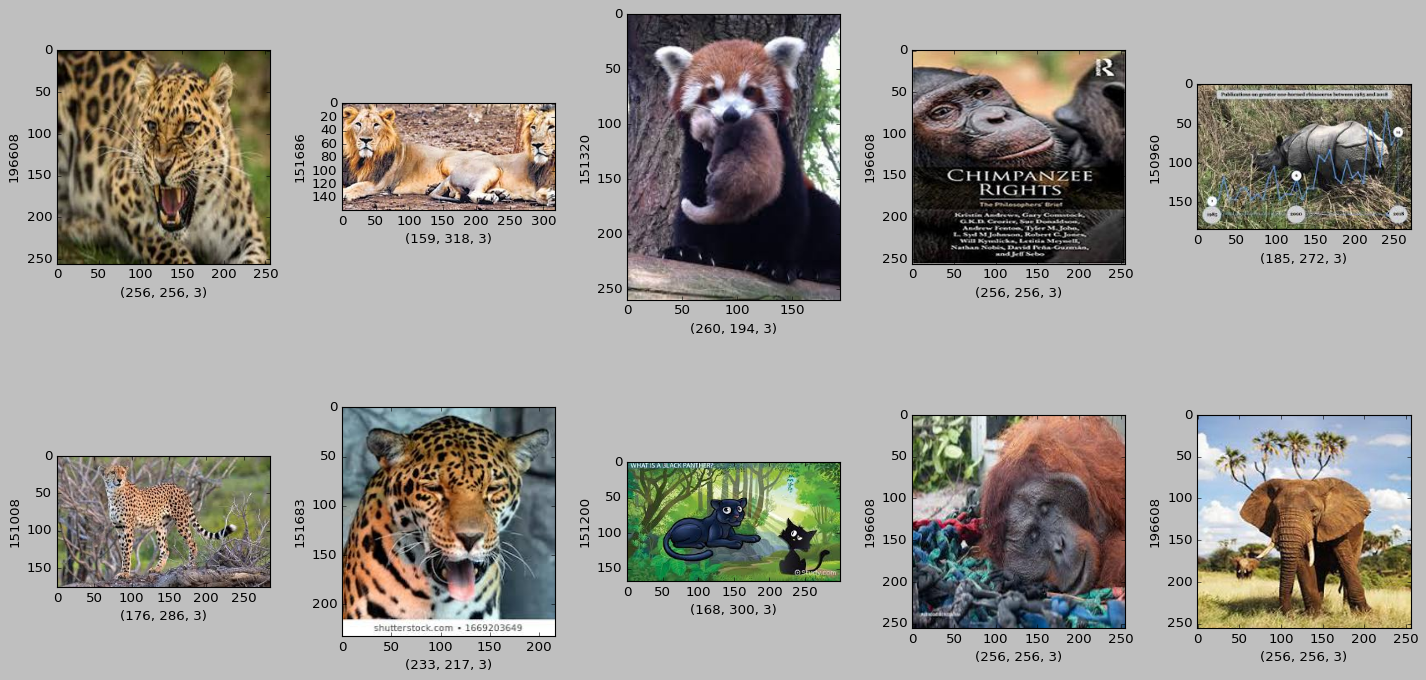

In [17]:
figure,axis = plt.subplots(2,5,figsize=(18,10))

for i,ax in enumerate(axis.flat):
    
    Pick_IMG = animal_list[i]
    Pick_IMG = cv2.cvtColor(Pick_IMG,cv2.COLOR_BGR2RGB)
    ax.set_xlabel(Pick_IMG.shape)
    ax.set_ylabel(Pick_IMG.size)
    ax.imshow(Pick_IMG)

plt.tight_layout()
plt.show()


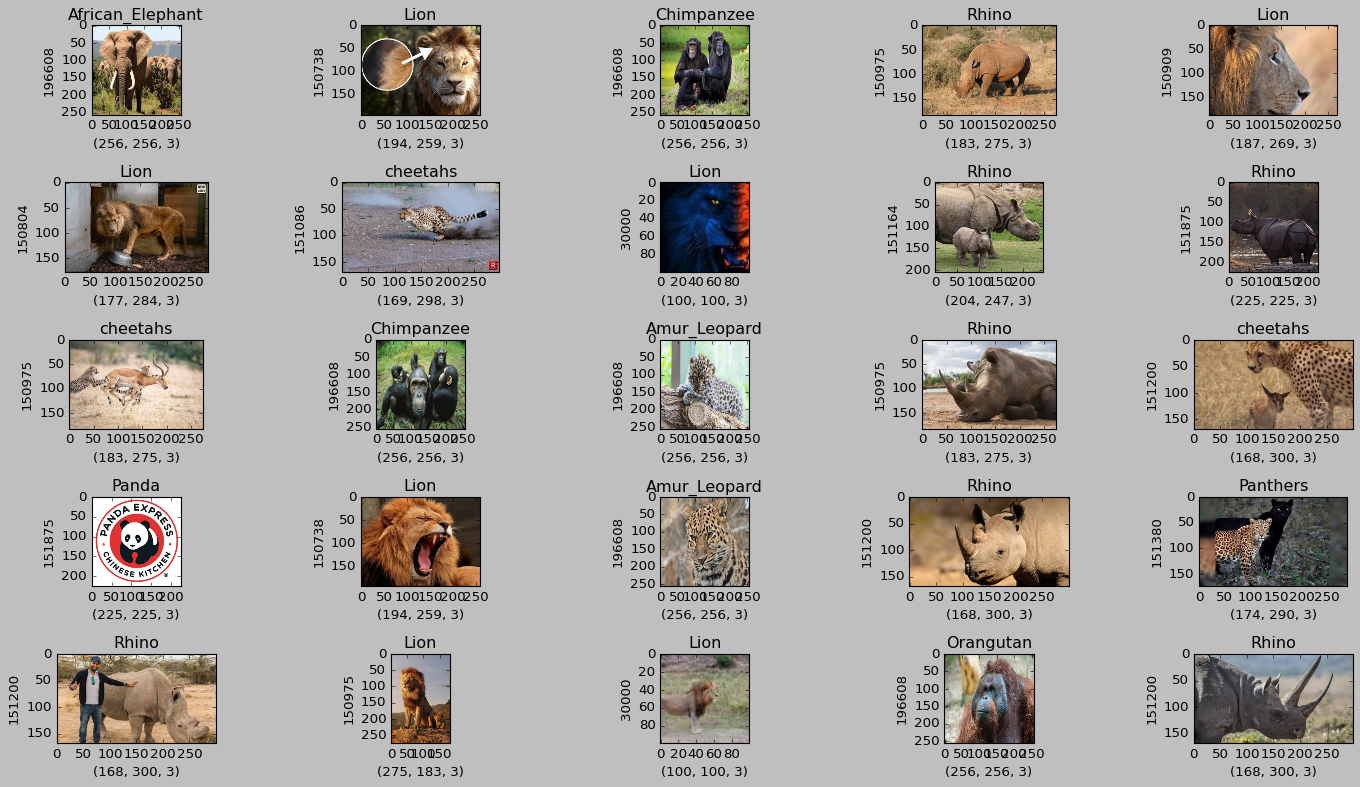

In [18]:
figure,axis = plt.subplots(5,5,figsize=(18,10))

for i,ax in enumerate(axis.flat):
    
    Pick_IMG = cv2.imread(Main_Train_Data["JPG"][i])
    Pick_IMG = cv2.cvtColor(Pick_IMG,cv2.COLOR_BGR2RGB)
    ax.set_xlabel(Pick_IMG.shape)
    ax.set_ylabel(Pick_IMG.size)
    ax.set_title(Main_Train_Data["CATEGORY"][i])
    ax.imshow(Pick_IMG)

plt.tight_layout()
plt.show()

# SPLITTING TEST AND TRAIN

In [19]:
Train_Data,Test_Data = train_test_split(Main_Train_Data,train_size=0.9,random_state=42,shuffle=True)

In [20]:
print(Train_Data.shape)

(5677, 2)


In [21]:
print(Test_Data.shape)

(631, 2)


# IMAGE GENERATOR PROCESS

#### STRUCTURE

In [44]:
Train_Image_Generator = ImageDataGenerator(rescale=1./255,
                                          zoom_range=0.3,
                                          shear_range=0.2,
                                          rotation_range=25,
                                          height_shift_range=0.2,
                                          width_shift_range=0.2,
                                          horizontal_flip=True,
                                          validation_split=0.1,
                                           brightness_range=[0.3,0.9],
                                           channel_shift_range=0.2)

In [45]:
Test_Image_Generator = ImageDataGenerator(rescale=1./255)

#### HOW TO LOOK BY GENERATOR

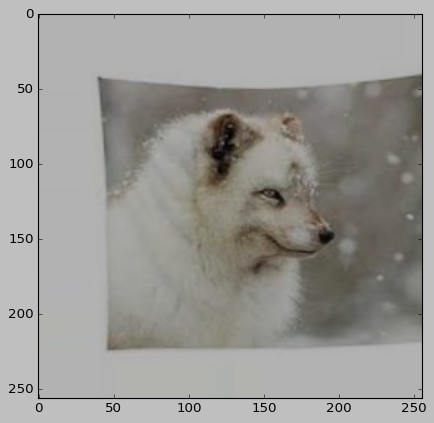

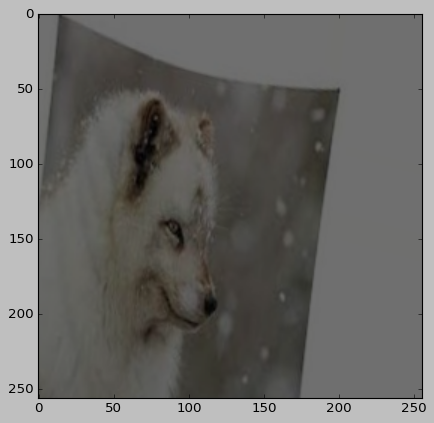

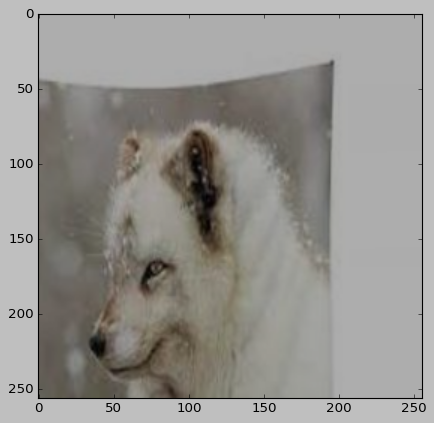

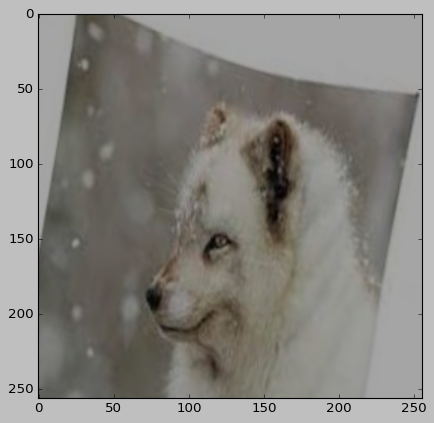

In [46]:
Example_IMG = cv2.imread(Main_Train_Data["JPG"][44])
Transformation_IMG = cv2.cvtColor(Example_IMG,cv2.COLOR_BGR2RGB)
Array_IMG = image.img_to_array(Transformation_IMG)
Array_IMG = Array_IMG.reshape((1,) + Array_IMG.shape)

i = 0

for batch in Train_Image_Generator.flow(Array_IMG,batch_size=32):
    plt.figure(i)
    
    Image_Pick = plt.imshow(image.img_to_array(batch[0]))
    
    i += 1
    
    if i % 4 == 0:
        break
        
plt.show()

#### APPLY

In [47]:
Train_IMG_Set = Train_Image_Generator.flow_from_dataframe(dataframe=Train_Data,
                                                         x_col="JPG",
                                                         y_col="CATEGORY",
                                                         target_size=(180,180),
                                                         color_mode="rgb",
                                                         class_mode="categorical",
                                                         subset="training")

Found 5110 validated image filenames belonging to 11 classes.


In [48]:
Validation_IMG_Set = Train_Image_Generator.flow_from_dataframe(dataframe=Train_Data,
                                                         x_col="JPG",
                                                         y_col="CATEGORY",
                                                         target_size=(180,180),
                                                         color_mode="rgb",
                                                         class_mode="categorical",
                                                         subset="validation")

Found 567 validated image filenames belonging to 11 classes.


In [49]:
Test_IMG_Set = Test_Image_Generator.flow_from_dataframe(dataframe=Test_Data,
                                                         x_col="JPG",
                                                         y_col="CATEGORY",
                                                         target_size=(180,180),
                                                         color_mode="rgb",
                                                         class_mode="categorical",
                                                         shuffle=False)

Found 631 validated image filenames belonging to 11 classes.


In [50]:
print("TRAIN: ")
print(Train_IMG_Set.class_indices)
print(Train_IMG_Set.classes[0:5])
print(Train_IMG_Set.image_shape)
print("---"*20)
print("VALIDATION: ")
print(Validation_IMG_Set.class_indices)
print(Validation_IMG_Set.classes[0:5])
print(Validation_IMG_Set.image_shape)
print("---"*20)
print("TEST: ")
print(Test_IMG_Set.class_indices)
print(Test_IMG_Set.classes[0:5])
print(Test_IMG_Set.image_shape)

TRAIN: 
{'African_Elephant': 0, 'Amur_Leopard': 1, 'Arctic_Fox': 2, 'Chimpanzee': 3, 'Jaguars': 4, 'Lion': 5, 'Orangutan': 6, 'Panda': 7, 'Panthers': 8, 'Rhino': 9, 'cheetahs': 10}
[8, 10, 7, 9, 9]
(180, 180, 3)
------------------------------------------------------------
VALIDATION: 
{'African_Elephant': 0, 'Amur_Leopard': 1, 'Arctic_Fox': 2, 'Chimpanzee': 3, 'Jaguars': 4, 'Lion': 5, 'Orangutan': 6, 'Panda': 7, 'Panthers': 8, 'Rhino': 9, 'cheetahs': 10}
[10, 9, 9, 6, 0]
(180, 180, 3)
------------------------------------------------------------
TEST: 
{'African_Elephant': 0, 'Amur_Leopard': 1, 'Arctic_Fox': 2, 'Chimpanzee': 3, 'Jaguars': 4, 'Lion': 5, 'Orangutan': 6, 'Panda': 7, 'Panthers': 8, 'Rhino': 9, 'cheetahs': 10}
[6, 8, 5, 1, 6]
(180, 180, 3)


# MODEL

In [59]:
Model = Sequential()

Model.add(Conv2D(24,(3,3),activation="relu",input_shape=(180,180,3)))
Model.add(BatchNormalization())
Model.add(MaxPooling2D((2,2),strides=2))

Model.add(Conv2D(64,(3,3),activation="relu",padding="same"))
Model.add(Dropout(0.3))
Model.add(MaxPooling2D((2,2),strides=2))

Model.add(Conv2D(64,(3,3),activation="relu",padding="same"))
Model.add(Dropout(0.3))
Model.add(MaxPooling2D((2,2),strides=2))

Model.add(Conv2D(128,(3,3),activation="relu",padding="same"))
Model.add(Conv2D(128,(3,3),activation="relu",padding="same"))
Model.add(Dropout(0.3))
Model.add(MaxPooling2D((2,2),strides=2))

Model.add(Conv2D(256,(3,3),activation="relu",padding="same"))
Model.add(Dropout(0.3))
Model.add(MaxPooling2D((2,2),strides=2))

Model.add(Flatten())
Model.add(Dense(2352,activation="relu"))
Model.add(Dropout(0.5))
Model.add(Dense(11,activation="softmax"))

In [60]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor="loss",patience=3,mode="min")

In [61]:
Model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [62]:
CNN_Model = Model.fit(Train_IMG_Set,validation_data=Validation_IMG_Set,epochs=100,callbacks=early_stop)

Epoch 1/100
160/160 [==============================] - 71s 433ms/step - loss: 2.6023 - accuracy: 0.1571 - val_loss: 2.4345 - val_accuracy: 0.0529
Epoch 2/100
160/160 [==============================] - 69s 428ms/step - loss: 1.8275 - accuracy: 0.3602 - val_loss: 2.4764 - val_accuracy: 0.1235
Epoch 3/100
160/160 [==============================] - 68s 428ms/step - loss: 1.5975 - accuracy: 0.4353 - val_loss: 2.4118 - val_accuracy: 0.1587
Epoch 4/100
160/160 [==============================] - 68s 426ms/step - loss: 1.4806 - accuracy: 0.4817 - val_loss: 1.8058 - val_accuracy: 0.3439
Epoch 5/100
160/160 [==============================] - 68s 426ms/step - loss: 1.3756 - accuracy: 0.5175 - val_loss: 1.5594 - val_accuracy: 0.4621
Epoch 6/100
160/160 [==============================] - 68s 428ms/step - loss: 1.2763 - accuracy: 0.5572 - val_loss: 1.5219 - val_accuracy: 0.5220
Epoch 7/100
160/160 [==============================] - 68s 424ms/step - loss: 1.2866 - accuracy: 0.5581 - val_loss: 1.4548 -

<AxesSubplot:>

<Figure size 800x800 with 0 Axes>

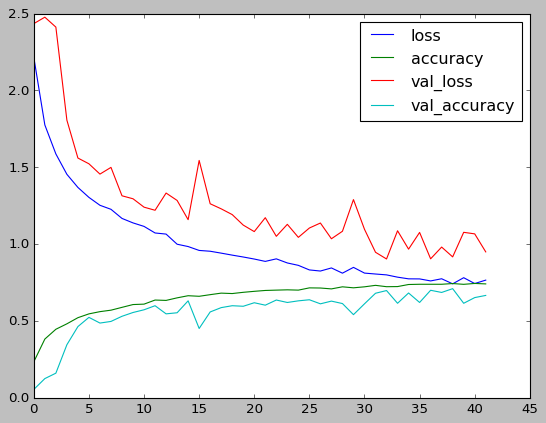

In [63]:
Grap_Data = pd.DataFrame(CNN_Model.history)
figure = plt.figure(figsize=(10,10))

Grap_Data.plot()

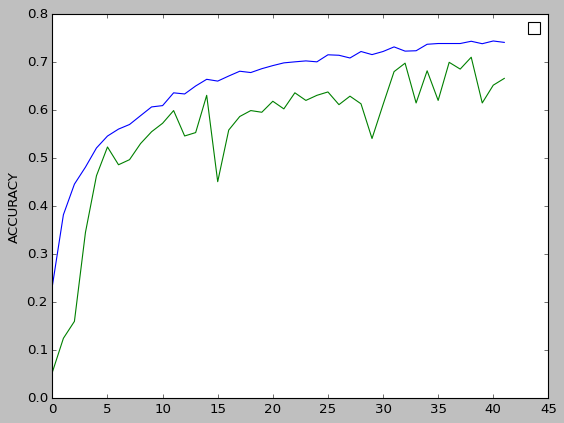

In [64]:
plt.plot(CNN_Model.history["accuracy"])
plt.plot(CNN_Model.history["val_accuracy"])
plt.ylabel("ACCURACY")
plt.legend()
plt.show()

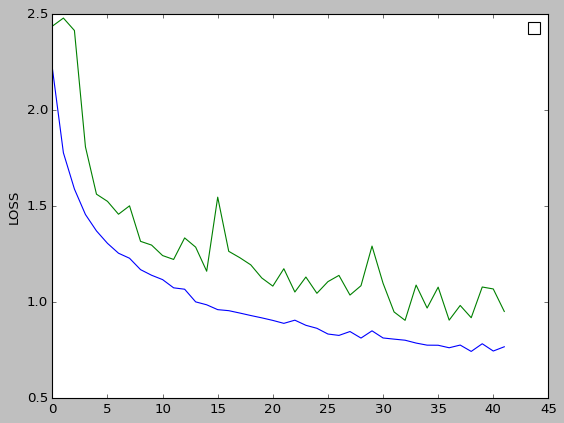

In [65]:
plt.plot(CNN_Model.history["loss"])
plt.plot(CNN_Model.history["val_loss"])
plt.ylabel("LOSS")
plt.legend()
plt.show()

In [66]:
Model_Results = Model.evaluate(Test_IMG_Set)
print("LOSS:  " + "%.4f" % Model_Results[0])
print("ACCURACY:  " + "%.4f" % Model_Results[1])

20/20 [==============================] - 3s 145ms/step - loss: 0.8729 - accuracy: 0.7116
LOSS:  0.8729
ACCURACY:  0.7116
